In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# 1. Importation des données
df = pd.read_csv("Physical_Capability_Data.csv",sep="\t")
print(df.columns)


Index(['testDate', 'expression', 'movement', 'quality', 'benchmarkPct'], dtype='object')


In [27]:
# Conversion de la colonne testDate en format datetime
df["testDate"] = pd.to_datetime(df["testDate"], format="%d/%m/%Y")


In [28]:
# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes avant traitement:\n", missing_values)

Valeurs manquantes avant traitement:
 testDate           0
expression         0
movement           0
quality            0
benchmarkPct    2561
dtype: int64


In [29]:
# Remplacement des valeurs manquantes dans benchmarkPct par la médiane
df["benchmarkPct"].fillna(df["benchmarkPct"].median(), inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_13256\2234234452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["benchmarkPct"].fillna(df["benchmarkPct"].median(), inplace=True)


In [30]:
# Vérification après traitement
print("\nValeurs manquantes après traitement:\n", df.isnull().sum())


Valeurs manquantes après traitement:
 testDate        0
expression      0
movement        0
quality         0
benchmarkPct    0
dtype: int64


In [31]:
# Encodage des variables catégorielles
#df = pd.get_dummies(df, columns=["expression", "movement", "quality"], drop_first=True)

In [32]:
# Normalisation de benchmarkPct
#df["benchmarkPct"] = (df["benchmarkPct"] - df["benchmarkPct"].min()) / (df["benchmarkPct"].max() - df["benchmarkPct"].min())


In [ ]:
# Affichage des premières lignes du DataFrame prétraité
print(df.head())


# BenchmarkPct :
# benchmarkPct (en pourcentage) représente la performance relative par rapport à cet objectif de référence.

# Si benchmarkPct est de 0.6480, cela signifie que la performance mesurée dans ce test est 64.80% de l'objectif de référence (ou du benchmark).

# Par exemple, si l'objectif de référence était une valeur de 100% de performance, alors la personne a atteint 64.80% de cet objectif.

    testDate expression    movement       quality  benchmarkPct
0 2023-07-03  isometric  upper body          pull        0.6480
1 2023-07-04    dynamic     agility  acceleration        0.3200
2 2023-07-10    dynamic     agility  deceleration        0.8670
3 2023-07-18  isometric        jump      take off        0.6480
4 2023-07-20    dynamic  upper body          pull        0.8525


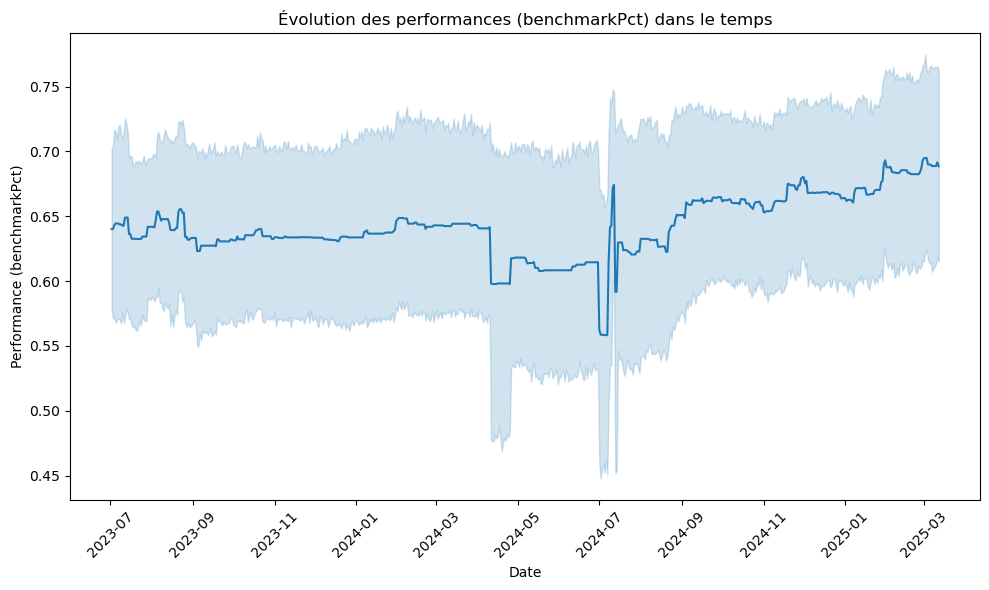

In [36]:
# 1. Évolution des performances dans le temps
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='testDate', y='benchmarkPct')
plt.title('Évolution des performances (benchmarkPct) dans le temps')
plt.xlabel('Date')
plt.ylabel('Performance (benchmarkPct)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

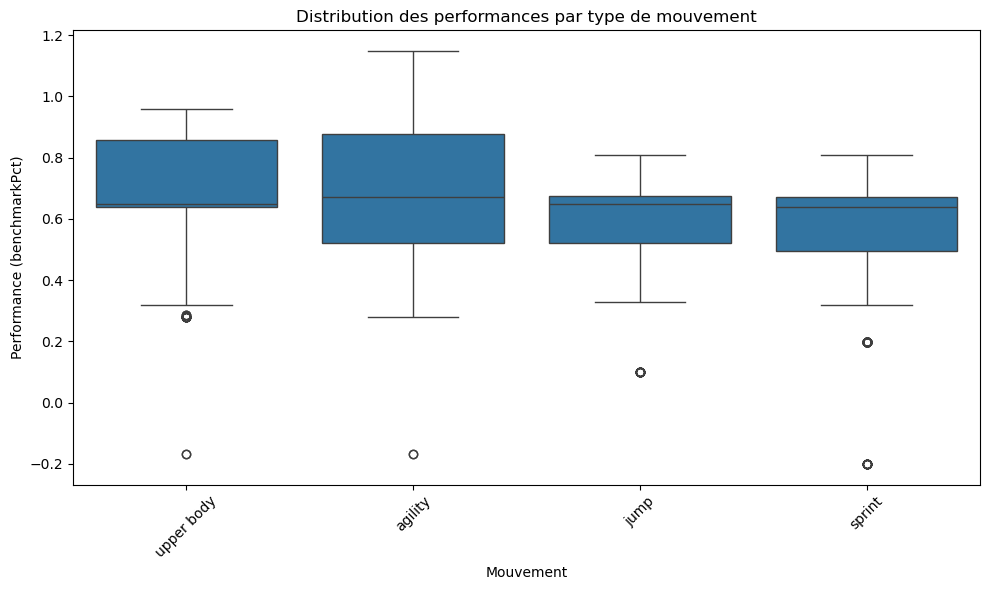

In [37]:
# 2. Distribution des performances par type de mouvement
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='movement', y='benchmarkPct')
plt.title('Distribution des performances par type de mouvement')
plt.xlabel('Mouvement')
plt.ylabel('Performance (benchmarkPct)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

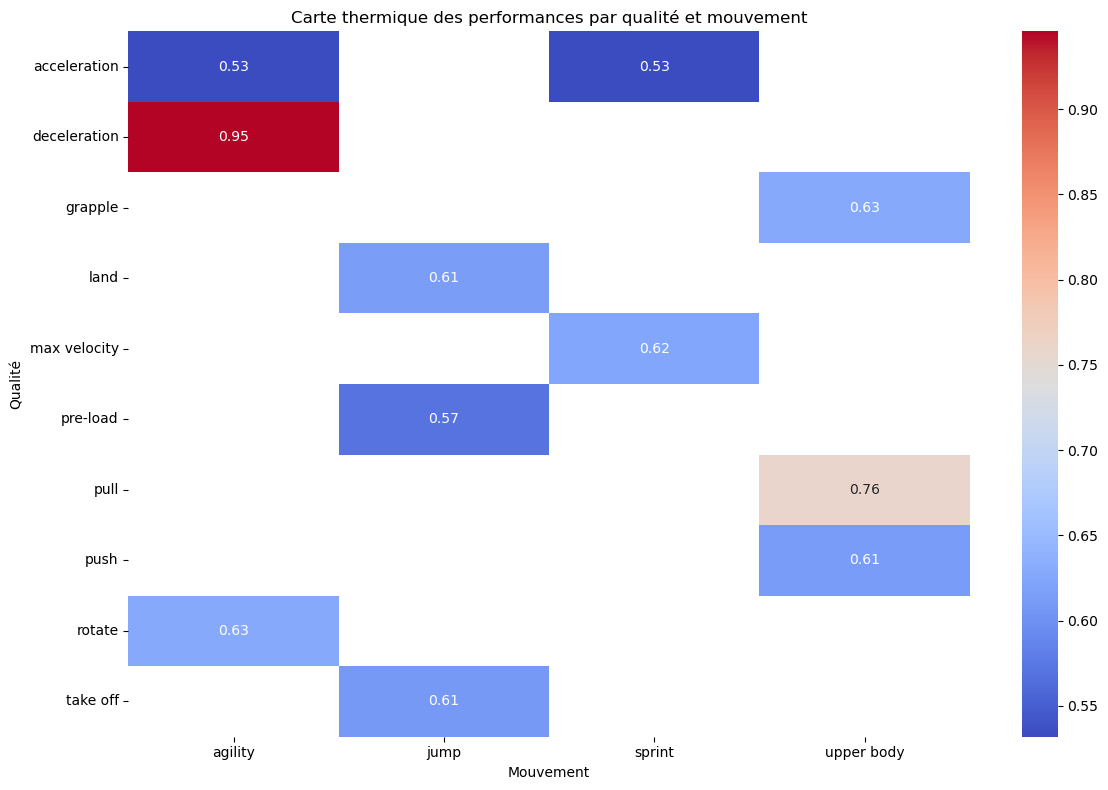

In [38]:
# 3. Heatmap des performances par qualité et mouvement
pivot_table = df.pivot_table(values='benchmarkPct', index='quality', columns='movement', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Carte thermique des performances par qualité et mouvement')
plt.xlabel('Mouvement')
plt.ylabel('Qualité')
plt.tight_layout()
plt.show()

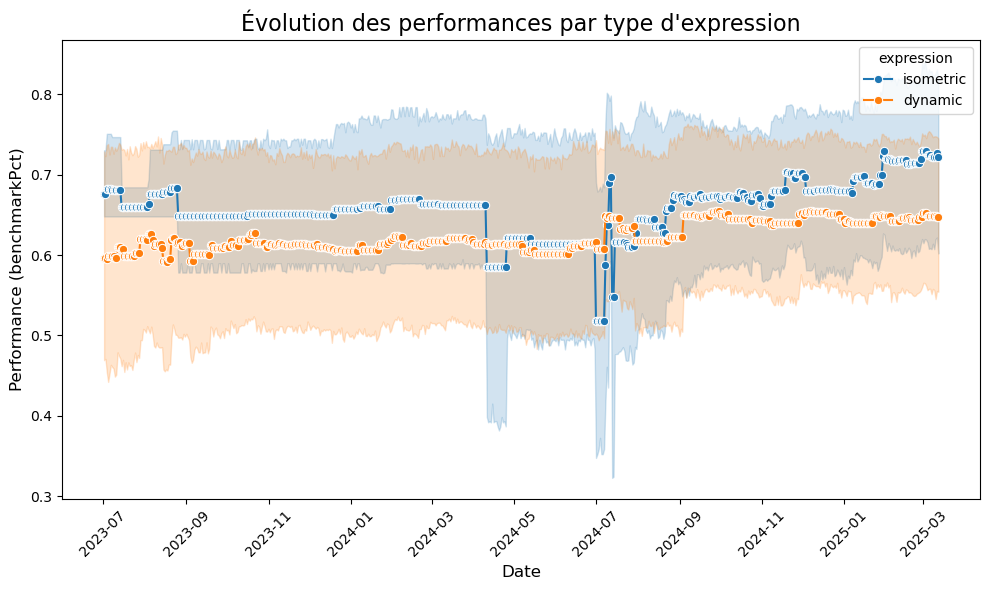

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='testDate', y='benchmarkPct', hue='expression', marker='o')
plt.title('Évolution des performances par type d\'expression', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Performance (benchmarkPct)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Voici une explication détaillée des différentes colonnes dans ton jeu de données :

### 1. **`testDate`** :
   - **Signification** : Cette colonne indique la date du test ou de la mesure. Elle est au format `jour/mois/année` (ex. : `03/07/2023`).
   - **Exemple** : `2023-07-03` signifie que le test a eu lieu le 3 juillet 2023.

### 2. **`expression`** :
   - **Signification** : Cette colonne décrit le type de test physique effectué, qui peut être soit **`isometric`** (test isométrique, où la force est générée sans mouvement de l'articulation) ou **`dynamic`** (test dynamique, où il y a du mouvement).
   - **Exemple** : `isometric` signifie qu'il s'agit d'un test de force isométrique (par exemple, maintenir une position statique), tandis que `dynamic` fait référence à un test avec un mouvement physique.

### 3. **`movement`** :
   - **Signification** : Cette colonne décrit la catégorie du mouvement effectué pendant le test. Cela peut indiquer des groupes musculaires ou des types d'exercices spécifiques.
     - Par exemple : `upper body` (haut du corps), `agility` (agilité), `jump` (saut), etc.
   - **Exemple** : `upper body` indique que l'exercice se concentre sur la partie supérieure du corps (comme les bras ou les épaules), `agility` fait référence à des tests qui mesurent l'agilité (souvent un test de changement rapide de direction), ou `jump` pour un test impliquant un saut.

### 4. **`quality`** :
   - **Signification** : Cette colonne indique une caractéristique spécifique du mouvement ou du test, tel que la qualité du mouvement ou l'aspect particulier de la performance mesurée.
     - Par exemple, des termes comme `acceleration` (accélération), `deceleration` (décélération), `take off` (décollage dans un saut), ou `pull` (tirer) peuvent être utilisés pour décrire des aspects particuliers d'un mouvement.
   - **Exemple** : `pull` signifie un mouvement de traction (comme tirer une charge), `take off` fait référence à la phase où les pieds quittent le sol lors d'un saut.

### 5. **`benchmarkPct`** :
   - **Signification** : Cette colonne représente la **performance** du test, généralement exprimée en pourcentage par rapport à une valeur de référence ou un objectif. Il mesure dans quelle mesure la personne a atteint ou dépassé un objectif prédéfini.
   - **Exemple** : `0.6480` signifie que la performance a atteint **64.80%** de l'objectif ou de la référence pour ce test particulier.

### Résumé de l'exemple de ligne :
- **Ligne 0** :
   - **Date** : Le test a eu lieu le `03/07/2023`.
   - **Test** : C'était un test **isométrique** (sans mouvement) de type **upper body** (haut du corps).
   - **Qualité** : Le mouvement évalué était de type **pull** (tirer).
   - **Performance** : La performance était de **64.80%** de l'objectif ou du benchmark.

Cet ensemble de données semble suivre l'évolution de diverses capacités physiques dans le temps en fonction de différents types de tests et de mouvements.